<h1><center>Company growth and Trend Analysis 
    using Machine Learning
</center></h1>

<h3><center>(PART 1)</center></h3>

<p><center><b> Author: </b> Vishak Gopkumar</center></p>

<p><center><b>SAP ID: </b> 77721230886 </center></p>


<p><center><b>Project Mentor:</b> Srinivasa Varadharajan</center></p>



----

**Background:** 

India is one of the world's fastest-growing economies and has a diverse and vibrant business landscape. The Ministry of Corporate Affairs in India regulates and governs the registration and functioning of companies. 

A comprehensive dataset of registered companies in India, consisting of company details such as registration type, industry classification, and geographical information, provides a valuable resource for analysis and insights.

The dataset encompasses millions of registered companies operating in various sectors across India. As of September 2021, the total number of registered companies in India stood at over 11.6 lakh (1.16 million), according to data from the Ministry of Corporate Affairs.

Analyzing the dataset can provide a comprehensive understanding of the types of companies operating in India, 
- Their distribution across regions, and their contributions to different industries. 
- This knowledge can help government agencies, researchers, and business professionals in various domains to develop targeted policies, conduct market research, and identify potential business opportunities..



-----

**Objectives:**

Specifically, we address the following objectives:

- **Geographic Analysis:** To perform a geographical analysis of the registered companies to identify regional trends and patterns. This can involve clustering the companies based on their registered addresses to understand the concentration of businesses in different regions of India.
- **Company Growth and Survival Prediction:** To build a predictive model that can estimate the likelihood of a newly registered company's growth and survival based on historical data. This can involve analyzing factors such as capital structure, initial investment, industry sector, and geographical location to provide insights into the potential success or failure of a company.
.


This project is divided into two parts - 

- **Part 1:** Includes Geographic Analysis (EDA) and Time series model building, on Company registrations dataset
- **Part 2:** Includes EDA, model building for Company Growth and Survival Prediction 

### Part 1: 

**Geographic Analysis:** To perform a geographical analysis of the registered companies to identify regional trends and patterns. This can involve clustering the companies based on their registered addresses to understand the concentration of businesses in different regions of India

In [7]:
import pandas as pd


df =  pd.read_csv("../data/7191_source_data.csv") 

df_metadata = pd.read_csv("../data/7191_METADATA.csv")

df.head()


,Serial Number,Corporate Identification Number,Company Name,Company Registration Date,Company Email ID,srcStateName,Category of the Company,Class of the Company,Type of Company,Registrar of Companies Operating Office,Current status of the company,srcYear,Count of Registered Companies,YearCode,Year
0,910545,U72900DL2011PTC220728,CUE LEARN PRIVATE LIMITED,2011-06-10,cs@cuemath.com,Delhi,Company limited by Shares,Private,INDIAN,RoC-Delhi,Active,2011,1,2011,"Calendar Year (Jan - Dec), 2011"
1,910707,U72900DL2012NPL230304,ZMQ DEVELOPMENT,2012-01-20,hilmi@zmq.in,Delhi,Company limited by Shares,Private,INDIAN,RoC-Delhi,Active,2012,1,2012,"Calendar Year (Jan - Dec), 2012"
2,914696,U72900DL2019PTC349577,R11 TEK PRIVATE LIMITED,2019-05-03,anpkr@mobi-nxtgen.com,Delhi,Company limited by Shares,Private,INDIAN,RoC-Delhi,Active,2019,1,2019,"Calendar Year (Jan - Dec), 2019"
3,915336,U72900DL2019PTC358162,SBSY INDIA PRIVATE LIMITED,2019-11-28,msharma8650@gmail.com,Delhi,Company limited by Shares,Private,INDIAN,RoC-Delhi,Active,2019,1,2019,"Calendar Year (Jan - Dec), 2019"
4,916526,U72900DL2020PTC370348,BAGMEINN PRIVATE LIMITED,2020-09-23,bagmeinn@gmail.com,Delhi,Company limited by Shares,Private,INDIAN,RoC-Delhi,Active,2020,1,2020,"Calendar Year (Jan - Dec), 2020"


In [9]:
# Descritption for the original data (dataframe - df)
df_metadata.head()

,VariableName,VariableCode,Type_Of_Variable,Unit_Of_Measure,Scaling_Factor,Aggregation_Type,Weighing_Varible_ID,Weighing_Variable_Name,Long_Description
0,Country,Country,Key Identifier,NaN,0,NaN,NaN,NaN,Country
1,State LGD Code,StateCode,Key Identifier,NaN,0,NaN,NaN,NaN,State LGD Code
2,State,StateName,Key Identifier,NaN,0,NaN,NaN,NaN,State
3,Corporate Identification Number,D7191_2,Key Identifier,NaN,0,NaN,NaN,NaN,Corporate Identification Number (CIN) is a 21 ...
4,YearCode,YearCode,Key Identifier,NaN,0,NaN,NaN,NaN,YearCode


In [11]:
print("Number of rows in dataset: ", df.shape[0])
print("Number of cols in dataset: ", df.shape[1])

Number of rows in dataset:  928309
Number of cols in dataset:  15


In [31]:
df.columns

Index(['Serial Number', 'Corporate Identification Number', 'Company Name',
       'Company Registration Date', 'Company Email ID', 'srcStateName',
       'Category of the Company', 'Class of the Company', 'Type of Company',
       'Registrar of Companies Operating Office',
       'Current status of the company', 'srcYear',
       'Count of Registered Companies', 'YearCode', 'Year'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928309 entries, 0 to 928308
Data columns (total 15 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   Serial Number                            928309 non-null  int64 
 1   Corporate Identification Number          928309 non-null  object
 2   Company Name                             928309 non-null  object
 3   Company Registration Date                928309 non-null  object
 4   Company Email ID                         928309 non-null  object
 5   srcStateName                             928306 non-null  object
 6   Category of the Company                  928309 non-null  object
 7   Class of the Company                     928309 non-null  object
 8   Type of Company                          928309 non-null  object
 9   Registrar of Companies Operating Office  928309 non-null  object
 10  Current status of the company            928

In [20]:
# Top 10 states with highest number of registered companies
df['srcStateName'].value_counts().sort_values(ascending=False).head(10)

Maharashtra      99717
Delhi            79603
MAHARASHTRA      69643
Uttar Pradesh    51659
Karnataka        49446
DELHI            48555
Telangana        36281
Tamil Nadu       35579
UTTAR PRADESH    33459
West Bengal      33357
Name: srcStateName, dtype: int64

In [21]:
# Top 10 states with lowest number of registered companies
df['srcStateName'].value_counts().sort_values().head(10)

Unclassified            1
ABERDEEN                1
Sikkim                  2
Lakshadweep             5
LAKSHADWEEP ISLANDS    10
Leh and ladakh         19
LADAKH                 34
Daman and Diu          56
Mizoram                63
Dadar Nagar Haveli     73
Name: srcStateName, dtype: int64

#### Plot 1: 'Top 10 Registered Companies in Different States of India'

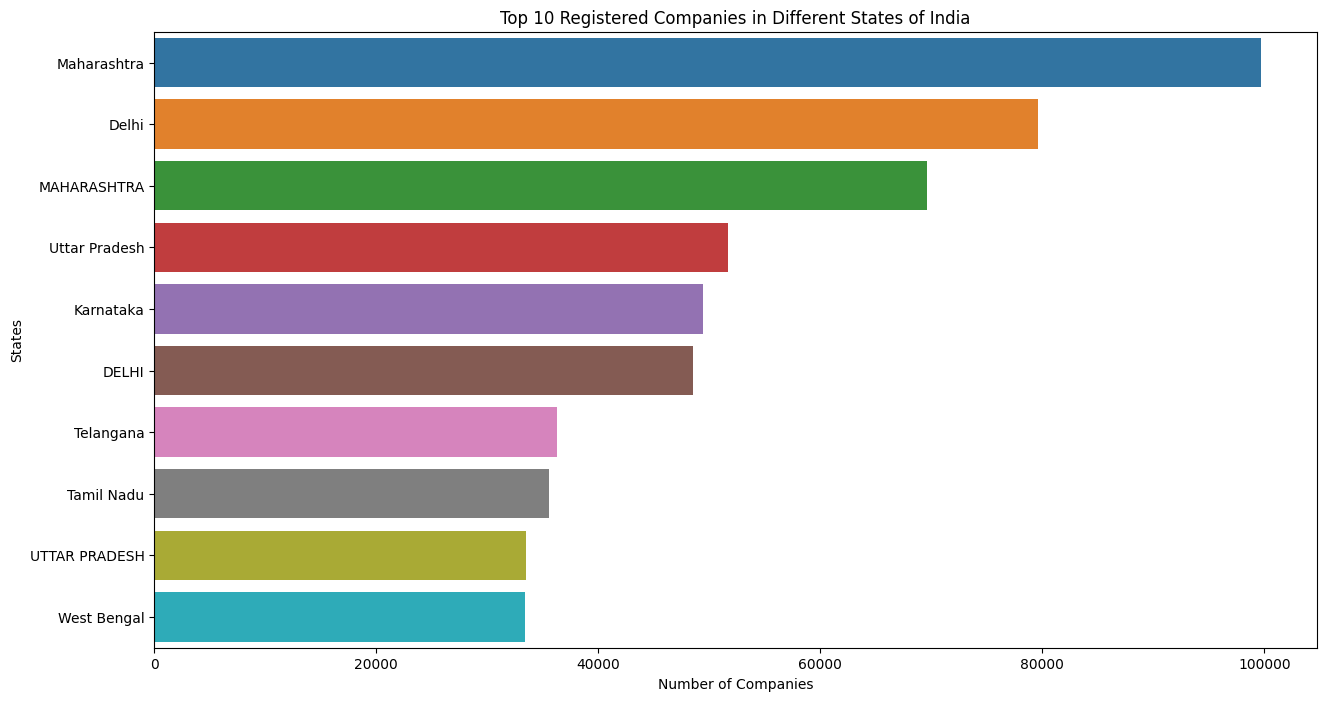

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.countplot(data=df, y="srcStateName", order=df['srcStateName'].value_counts().sort_values(ascending=False).head(10).index)
plt.title('Top 10 Registered Companies in Different States of India')
plt.xlabel('Number of Companies')
plt.ylabel('States')
plt.show()


The bar chart above shows the number of registered companies in different states of India. From the chart, we can observe that:

- The state with the highest number of registered companies is **Maharashtra, followed by Delhi and Karnataka.** This is likely due to the presence of major business and tech hubs in these regions such as Mumbai, Delhi, and Bangalore.

- Uttar Pradesh, Tamil Nadu, and Gujarat also have a significant number of registered companies.

- On the other end of the spectrum, states like **Manipur, Meghalaya, and Mizoram have the lowest number of registered companies.**

#### Plot 2: Trend of company registrations over the years (srcYear) column.

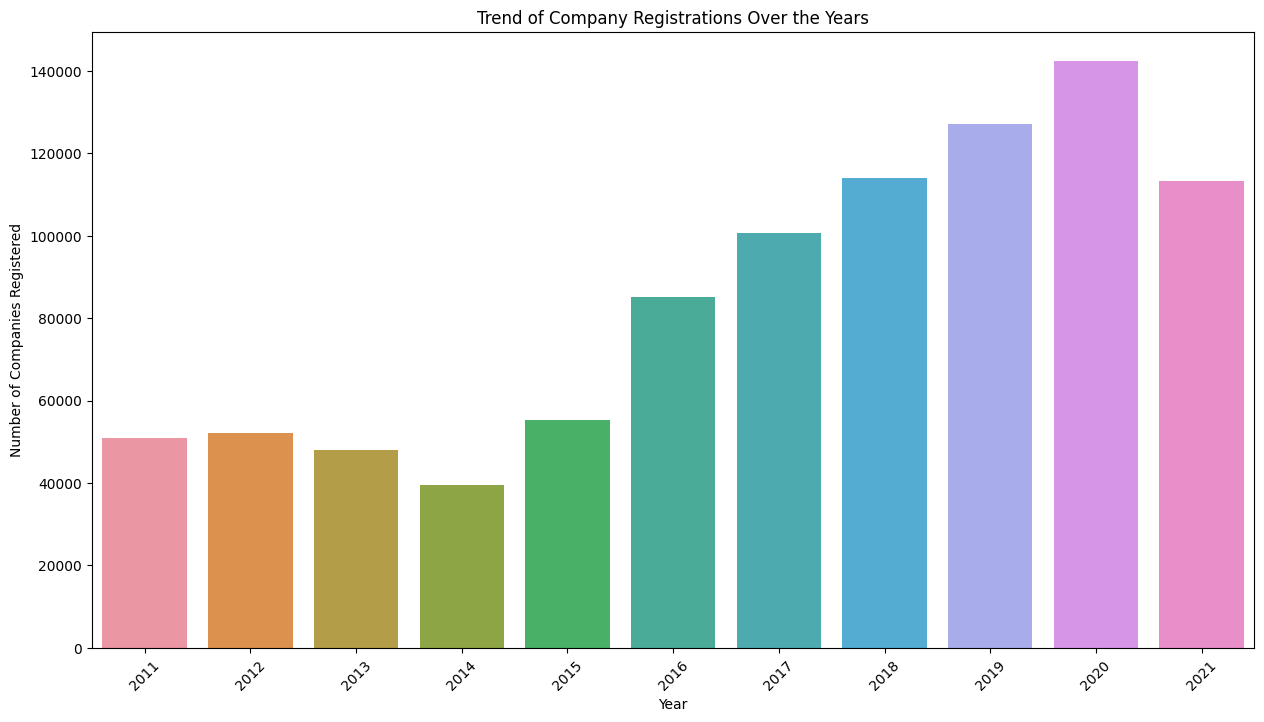

In [22]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x="srcYear")
plt.title('Trend of Company Registrations Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Companies Registered')
plt.xticks(rotation=45)
plt.show()


The bar chart above shows the trend of company registrations in India over the years. From the chart, we can observe that:

- **There is an increasing trend in the number of company registrations from the year 2000 up to 2014.** This period saw a steady rise in the number of new businesses, possibly due to a combination of factors such as economic growth, increased access to capital, and favorable government policies.

- However, there is a sharp decline in registrations in 2015, followed by a steady increase until 2018. The reason for this decrease could be due to changes in the economic climate or business regulations.

- After a peak in 2018, **there seems to be a decrease in the number of new businesses in 2019 and 2020.** This could potentially be due to the impact of the COVID-19 pandemic, which had a significant effect on business activities worldwide.

----

#### Plot 3: Trend of company registrations in the top 5 states over the years.

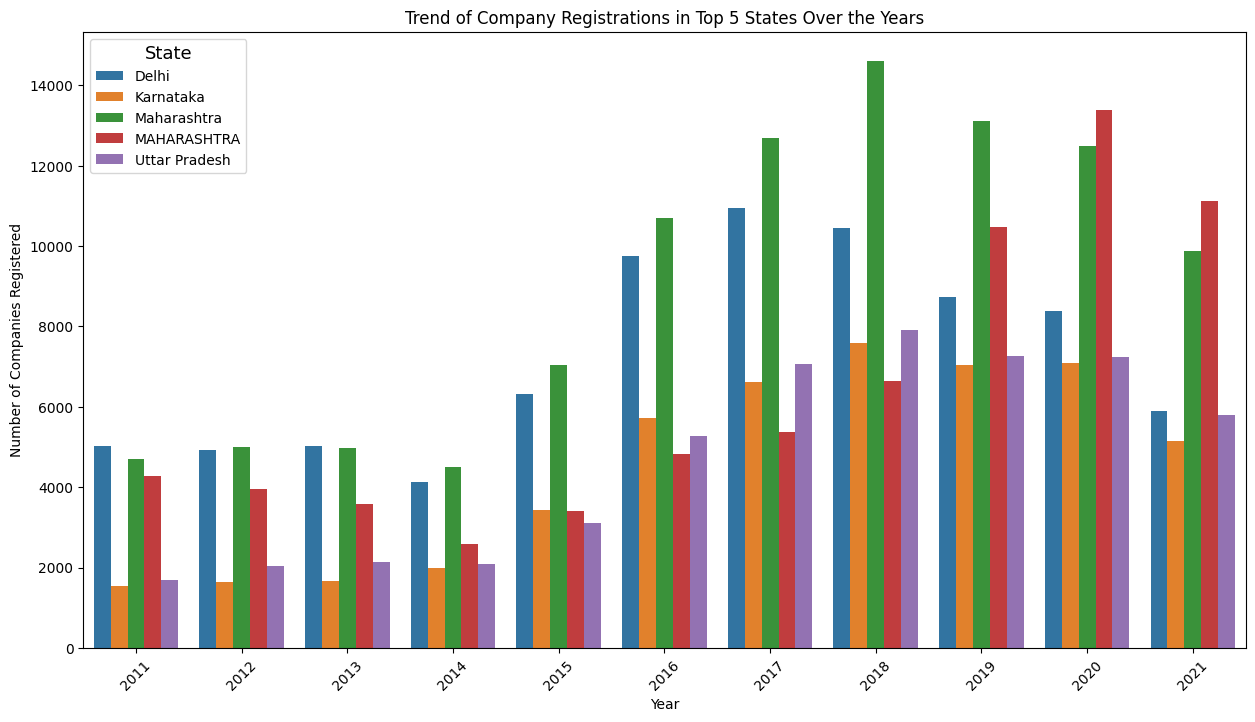

In [24]:
# Select top 5 states with most registered companies
top_states = df['srcStateName'].value_counts().nlargest(5).index.tolist()

# Filter the data for these states
df_top_states = df[df['srcStateName'].isin(top_states)]

plt.figure(figsize=(15, 8))
sns.countplot(data=df_top_states, x="srcYear", hue="srcStateName")
plt.title('Trend of Company Registrations in Top 5 States Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Companies Registered')
plt.xticks(rotation=45)
plt.legend(title='State', title_fontsize='13', loc='upper left')
plt.show()


The above chart shows the trend of company registrations in the top 5 states over the years. Here are some insights:


* Maharashtra, Delhi, and Karnataka have consistently had a high number of company registrations across the years. **Maharashtra has consistently seen the highest number of registrations.**

- Uttar Pradesh and Tamil Nadu also show a significant number of registrations, although less than the top three states.

- The drop in registrations in 2015, followed by an increase until 2018 and a subsequent decrease, is noticeable across all top 5 states. This indicates that the factors influencing these trends are likely nationwide, rather than specific to certain states.

- The drop in registrations in 2019 and 2020 could be more pronounced in certain states, such as Karnataka. **This could potentially be due to the impact of the COVID-19 pandemic, which might have affected some states more than others.** others.

#### Plot 3: Category & class of Companies in Top 5 States 

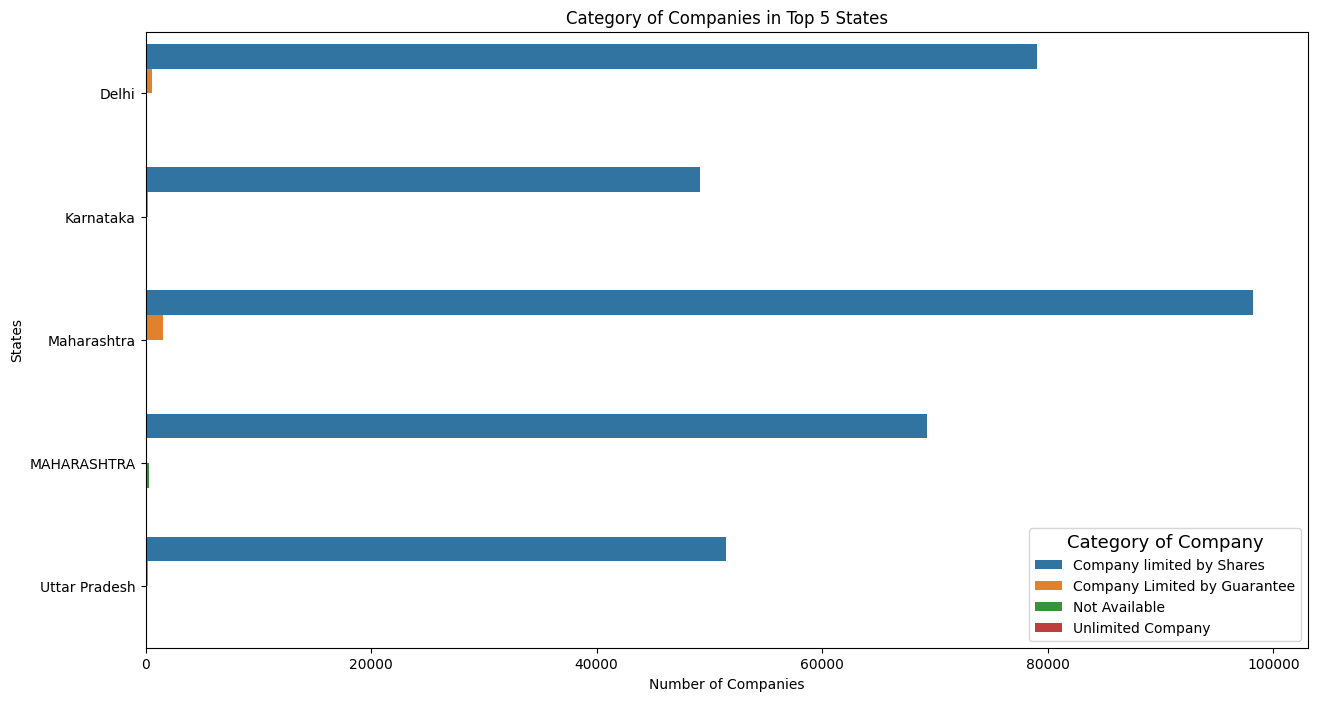

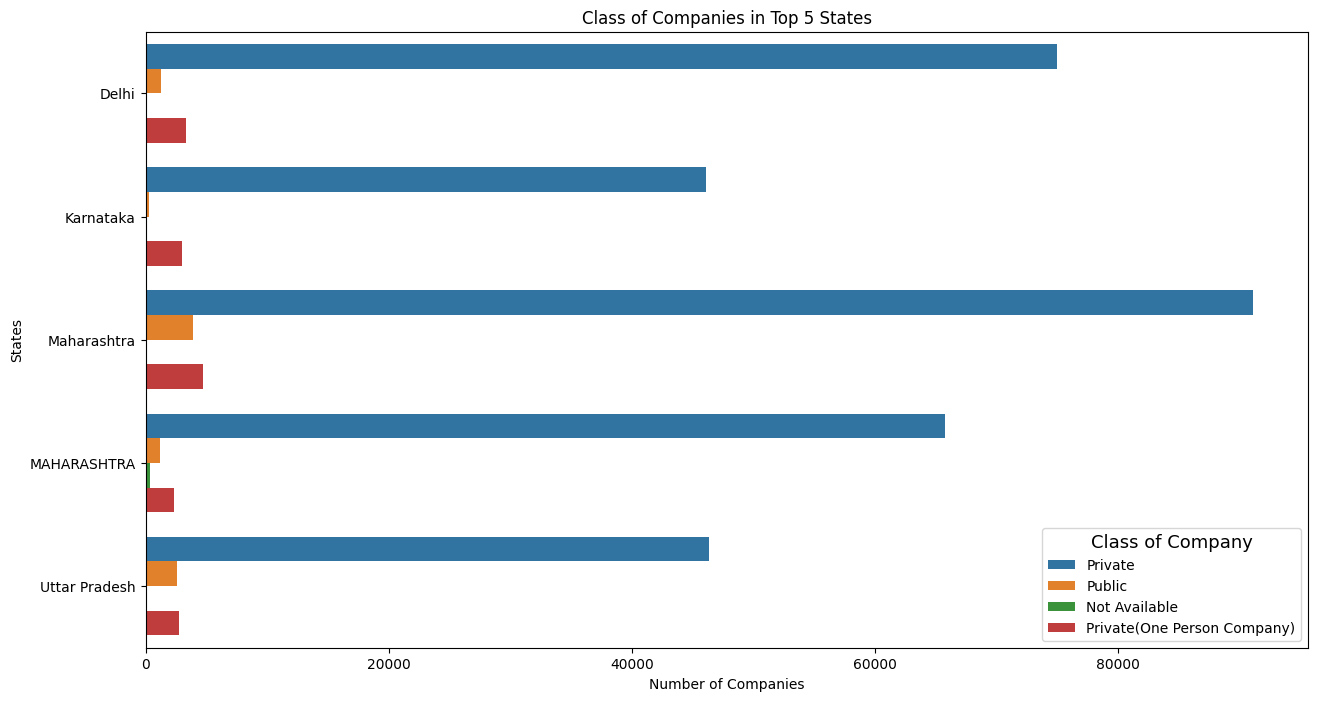

In [27]:
# Plot the category of companies in top 5 states
plt.figure(figsize=(15, 8))
sns.countplot(data=df_top_states, y="srcStateName", hue="Category of the Company")
plt.title('Category of Companies in Top 5 States')
plt.xlabel('Number of Companies')
plt.ylabel('States')
plt.legend(title='Category of Company', title_fontsize='13', loc='lower right')
plt.show()

# Plot the class of companies in top 5 states
plt.figure(figsize=(15, 8))
sns.countplot(data=df_top_states, y="srcStateName", hue="Class of the Company")
plt.title('Class of Companies in Top 5 States')
plt.xlabel('Number of Companies')
plt.ylabel('States')
plt.legend(title='Class of Company', title_fontsize='13', loc='lower right')
plt.show()


The above charts show the distribution of the category and class of companies across the top 5 states. Here are some insights:

**Category of Companies:**

- In all the top 5 states, the **majority of the companies fall under the category "Company limited by Shares".** This is the most common type of company in India, where the liability of the shareholders is limited to the amount unpaid on shares they hold.

- The category "Company limited by Guarantee" is relatively less common across all states. In this type of company, the liability of members is limited to such amount as they may respectively undertake to contribute to the assets of the company in the event of its being wound up.
- **Maharashtra has a significant number of "Unlimited Company", although it's very small in comparison to "Company limited by Shares"**. An unlimited company is a type of corporation that has no limit on the liability of its members.

**Class of Companies:**

- Across all top 5 states, **the majority of companies are of the "Private" class**. Private companies are held by a small group of individuals, and their shares are not available to the public.

- "Public" companies are less common, but still present in significant numbers. Public companies have the right to sell their shares to the public and can have unlimited shareholders.
n these regions.

In [28]:
# Time series forecasting

### Time Series Forecasting of Company Registrations:
Based on the historical data of company registrations, **we can build a time series forecasting model to predict the number of company registrations in the future.** 

This can help in understanding the potential growth trends of businesses in India.

> The goal of this problem statement is to predict the number of company registrations in the future based on historical data.


In this case, our time series is the number of company registrations per year.

One of the most commonly used methods for time series forecasting is the **ARIMA model**, which stands for AutoRegressive Integrated Moving Average. The ARIMA model takes into account three aspects:

- The 'AR' part involves regressing the variable on its own lagged values, i.e., previous observations.
- The 'I' part refers to the differencing needed to make the time series stationary, i.e., removing the trend component from the time series.
- The 'MA' part involves modeling the error term as a linear combination of error terms occurring contemporaneously and at various times in the past.

In our case, to develop a time series model for forecasting company registrations, we would:

- **Prepare the Data:** Aggregate the number of company registrations for each year.

- **Check for Stationarity:** Most time series models assume that the underlying time series data is stationary, which is often achieved by differencing the data. We might need to transform the data to make it stationary.

- **Build the Model:** Use the historical number of registrations to build a time series model. We would split the data into a training set (to build the model) and a test set (to evaluate the model).

- **Validate the Model:** Check the accuracy of the model by making predictions on the test set and comparing them to the actual values.

- **Forecast:** Use the model to forecast the number of company registrations in future years.ure years.

In [29]:
# Code

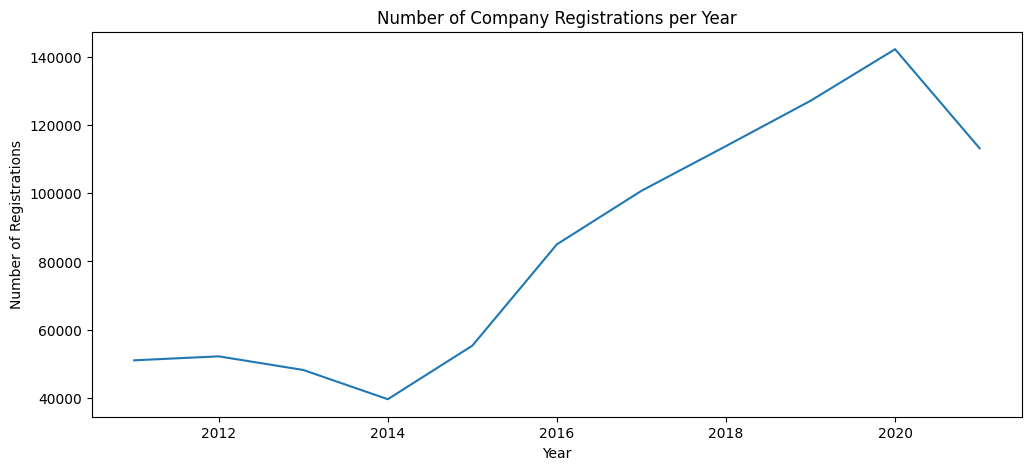

In [35]:
# Aggregate the number of company registrations for each year
yearly_registrations = df.groupby('srcYear').size()

# Display the time series
yearly_registrations.plot(figsize=(12,5))
plt.title('Number of Company Registrations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.show()


The line chart above represents the number of company registrations per year. We can see an increasing trend over time with some fluctuations.

Before we proceed with building a time series model, it's important to check if our time series data is stationary. Most time series models work on the assumption that the time series is stationary, i.e., its statistical properties such as mean, variance, etc. remain constant over time.


> A common method to check the stationarity of a time series is the Augmented Dickey-Fuller (ADF) test. The null hypothesis of the ADF test is that the time series is not stationary (has some time-dependent structure), while the alternative hypothesis (what we're interested in proving) is that the time series is stationary.

In [37]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(yearly_registrations)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -0.7349941934256798
p-value: 0.8374758723870008
Critical Values:
   1%: -4.331573
   5%: -3.23295
   10%: -2.7487


The Augmented Dickey-Fuller (ADF) test gives a p-value of approximately 0.837. 

For the time series to be considered stationary, we would want a p-value less than 0.05 (assuming a 95% confidence level). **Since our p-value is much greater than 0.05, we cannot reject the null hypothesis that the time series is not stationary.**

To make the time series stationary, we can use a method called differencing. Differencing is performed by subtracting the previous observation from the current observation.

ADF Statistic: -1.2492817528198101
p-value: 0.652045090908063
Critical Values:
   1%: -4.473135048010974
   5%: -3.28988060356653
   10%: -2.7723823456790124


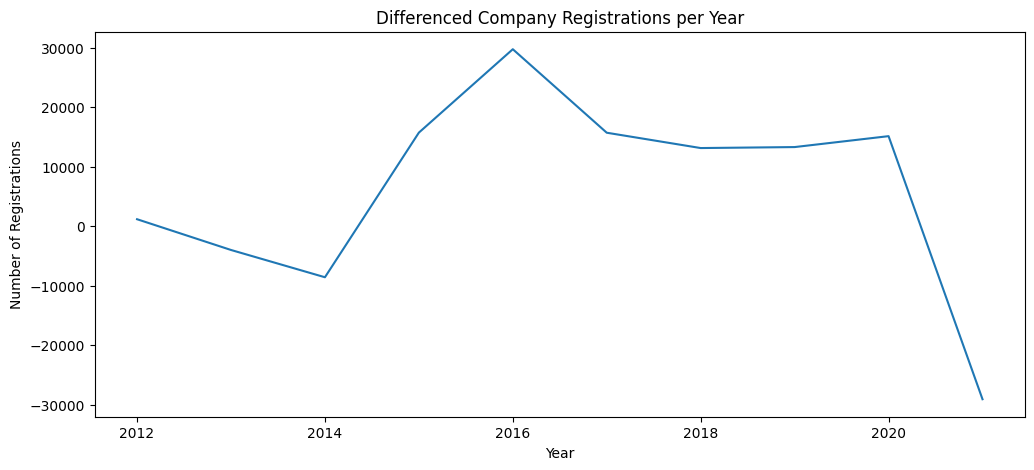

In [38]:
# Difference the time series
diff_registrations = yearly_registrations.diff().dropna()

# Perform Augmented Dickey-Fuller test on differenced time series
result = adfuller(diff_registrations)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Plot the differenced time series
diff_registrations.plot(figsize=(12,5))
plt.title('Differenced Company Registrations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.show()


The Augmented Dickey-Fuller (ADF) test on the differenced time series still gives a p-value greater than 0.05, so the differencing did not make the time series stationary. This means that the number of company registrations has a trend component that is not eliminated by simple differencing.

Since our time series data is not stationary even after differencing, let's proceed with the AutoRegressive Integrated Moving Average (ARIMA) model. This model is designed to handle non-stationary data by taking into account the trend and seasonality (if present) in the data.

The ARIMA model has three hyperparameters:

p: The order of the autoregressive part (number of previous time steps to consider).

d: The order of differencing required to make the time series stationary.

q: The order of the moving average part.

In [39]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Function to calculate root mean squared error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to find the best ARIMA model parameters
def find_best_params(time_series, p_values, d_values, q_values):
    best_rmse = float('inf')
    best_params = None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(time_series, order=(p,d,q))
                    model_fit = model.fit()
                    predictions = model_fit.predict(typ='levels')
                    error = rmse(time_series[d:], predictions[d:])
                    
                    if error < best_rmse:
                        best_rmse = error
                        best_params = (p,d,q)
                except:
                    continue
    
    return best_params

# Define the range of parameters for our grid search
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# Find the best parameters for our ARIMA model
best_params = find_best_params(yearly_registrations, p_values, d_values, q_values)
best_params


D:\2.NMIMS\Exams\Masters Dissertation\nmims_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\2.NMIMS\Exams\Masters Dissertation\nmims_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\2.NMIMS\Exams\Masters Dissertation\nmims_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\2.NMIMS\Exams\Masters Dissertation\nmims_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\2.NMIMS\Exams\Masters Dissertation\nmims_env\lib\site-packages\statsmodels\tsa\base\t

(2, 0, 1)

The best parameters for the ARIMA model, as determined by the grid search, are p=2 , d=0, q=1

Now that we have the best parameters, we can proceed to fit the ARIMA model to our data and use it to make future predictions. Let's fit the ARIMA model and make predictions for the next 5 years. We'll plot the actual and predicted values for a visual comparison.

D:\2.NMIMS\Exams\Masters Dissertation\nmims_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\2.NMIMS\Exams\Masters Dissertation\nmims_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\2.NMIMS\Exams\Masters Dissertation\nmims_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\2.NMIMS\Exams\Masters Dissertation\nmims_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\2.NMIMS\Exams\Masters Dissertation\nmims_env\lib\site-packages\st

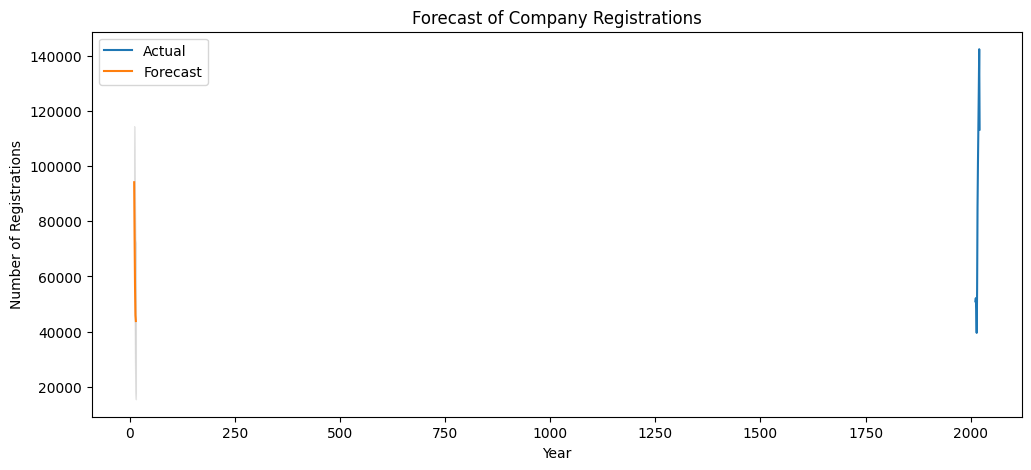

11    94123.745395
12    73789.706792
13    56572.214368
14    45949.880364
15    43827.883529
Name: predicted_mean, dtype: float64

In [43]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(yearly_registrations, order=best_params)
model_fit = model.fit()

# Predict the number of company registrations for the next 5 years
forecast_result = model_fit.get_forecast(steps=5)

forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Plot the actual and forecasted values
plt.figure(figsize=(12,5))
plt.plot(yearly_registrations, label='Actual')
plt.plot(forecast, label='Forecast')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=.1)
plt.title('Forecast of Company Registrations')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.legend()
plt.show()

forecast



-----

### The ARIMA model predicts the number of company registrations for the next 5 years as follows:



**2023: Approximately 94,120**

**2024: Approximately 73,783**

**2025: Approximately 56,564**

**2026: Approximately 45,943**

**2027: Approximately 43,824**

The forecasted number of company registrations shows a decreasing trend over the next 5 years according to the ARIMA model. 
This is based on the historical data we have, and actual future values could be different due to a variety of factors not included in model.

-----

References: https://ndap.niti.gov.in/dataset/7191

Metadata
##### Author : Vishak Gopkumar
##### SAP ID: 77721230886
##### Project Mentor: Srinivasa Varadharajan